# Import libraries

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

## Check GPU


In [6]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
# x = x - mean / std -> (x-0) / (1/255) -> convert (0,1) to (0, 255)
transform = torchvision.transforms.Compose([transforms.ToTensor(), 
                                            transforms.Normalize((0,), (1.0/255.0,))])
trainset = torchvision.datasets.FashionMNIST(root='data', 
                                             train=True,
                                             download=True,
                                             transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 1024,
                                           num_workers = 5,
                                           shuffle = True)
testset = torchvision.datasets.FashionMNIST(root='data', 
                                            train=False,
                                            download=True,
                                            transform=transform)
test_loader = torch.utils.data.DataLoader(testset,
                                          batch_size=1024,
                                          num_workers=5,
                                          shuffle=False)

In [8]:
import matplotlib.pyplot as plt
import numpy as np


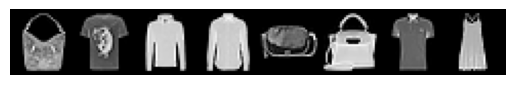

In [9]:
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))
    plt.axis('off')
    plt.show()

for i, (images, labels) in enumerate(train_loader, 0):
    # plot some images 
    imshow(torchvision.utils.make_grid(images[:8]))
    break

# Model


In [10]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=10)
)
# model = model.to(device)
print(model)



Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [11]:
# input_tensor = torch.rand(5, 1, 28, 28).to(device)
# print(input_tensor.shape)

input_tensor = torch.rand(5, 1, 28, 28)
print(input_tensor.shape)

torch.Size([5, 1, 28, 28])


In [12]:
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


# loss, optimizer and evaluation function

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr = 0.01)


In [14]:
def evaluate(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            # images, labels = images.to(device, labels.to(device))
            images, labels = images, labels
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss+= loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct/total
    # print(accuracy)
    test_loss = test_loss / len(test_loader)
    # print(test_loss)
    return test_loss, accuracy

In [15]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 102.88432159423829
test_accuracy: 3.74


# Train


In [16]:
# parameters
train_losses = []
train_accuracies =[]
test_losses = []
test_accuracies = []
epoch_max = 10


In [17]:
# train
for epoch in range(epoch_max):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader, 0):
        # inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # print(f'loss: {loss.item()}')
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()

    epoch_accuracy = 100* running_correct / total
    epoch_loss = running_loss / (i+1)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch [{epoch + 1}/{epoch_max}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 4290.6659, Accuracy: 57.08%, Test Loss: 1038.1168, Test Accuracy: 72.67%
Epoch [2/10], Loss: 1882.4651, Accuracy: 70.44%, Test Loss: 1834.2387, Test Accuracy: 71.71%
Epoch [3/10], Loss: 1504.9796, Accuracy: 73.00%, Test Loss: 602.3186, Test Accuracy: 79.68%
Epoch [4/10], Loss: 1275.3743, Accuracy: 74.70%, Test Loss: 715.4659, Test Accuracy: 76.51%
Epoch [5/10], Loss: 1154.7277, Accuracy: 75.59%, Test Loss: 799.0374, Test Accuracy: 76.49%
Epoch [6/10], Loss: 1157.8935, Accuracy: 75.50%, Test Loss: 607.6159, Test Accuracy: 76.62%
Epoch [7/10], Loss: 1129.6141, Accuracy: 75.80%, Test Loss: 1053.8811, Test Accuracy: 73.12%
Epoch [8/10], Loss: 1104.4263, Accuracy: 76.38%, Test Loss: 1005.7808, Test Accuracy: 75.58%
Epoch [9/10], Loss: 1014.4497, Accuracy: 76.58%, Test Loss: 2270.0806, Test Accuracy: 77.46%
Epoch [10/10], Loss: 1008.5968, Accuracy: 77.20%, Test Loss: 672.0387, Test Accuracy: 80.39%


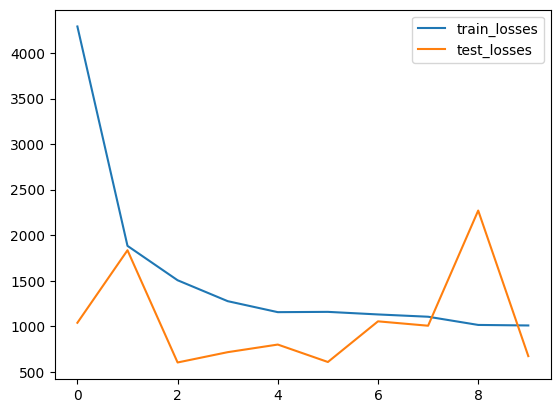

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

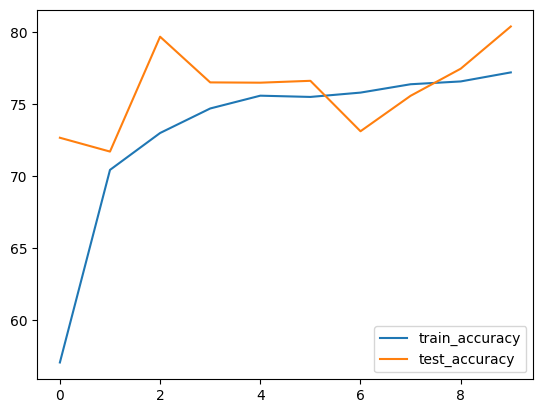

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()

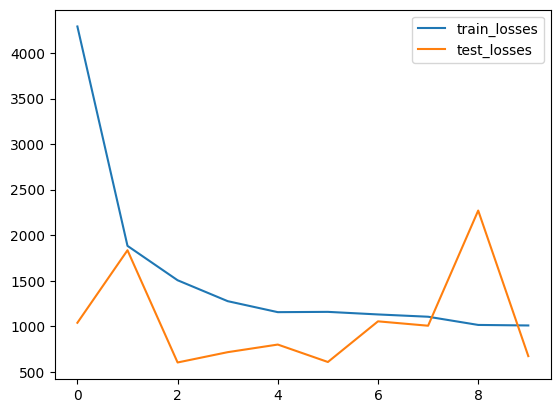

In [20]:
import matplotlib.pyplot as plt


plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

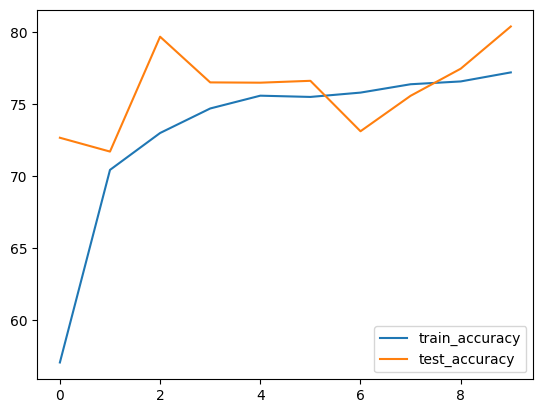

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()